## ТИТАНИК С KAGGLE
url: https://www.kaggle.com/c/titanic/overview

Что изучаем:
* классификация
* обработка данных
* выбор наилучших моделей
* регуляризация (L1 и L2)
* оценка по метрикам


In [1]:
!chcp 65001

Active code page: 65001


### 1. ПРЕДОБРАБОТКА ДАННЫХ

In [2]:
import pandas as pd 
import numpy as np

In [3]:
url_test = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/refs/heads/master/data/test.csv'
url_train = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/refs/heads/master/data/train.csv'

In [4]:
test_data = pd.read_csv(url_test)
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
train_data = pd.read_csv(url_train)
train_data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Заменяем пропущенные значения

Простой способ - замена средним для возраста

In [9]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [10]:
train_data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,29.699118,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000000,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.000000,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.000000,0,1,231919,23.0000,NaN,S


Неопределенные кабинки заменим 'Unknown'

In [11]:
train_data['Cabin'].fillna('Unknown', inplace=True)
test_data['Cabin'].fillna('Unknown', inplace=True)

In [12]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S


Удалим данные, где в Embarked - NaN

In [13]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [14]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Пол заменим на 1 - мужчина, 0 - женщина

In [15]:
train_data.Sex.replace({'female': 0, 'male': 1}, inplace=True)
test_data.Sex.replace({'female': 0, 'male': 1}, inplace=True)

Для определения взаимодействия между признаками воспользуемся матрицей корреляции и тепловой картой

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
corr_matrix = train_data.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193
Sex,0.043136,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000


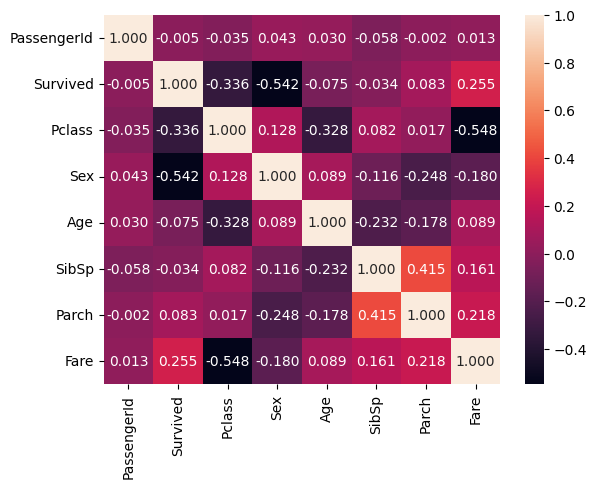

In [18]:
sns.heatmap(corr_matrix, annot=True, fmt=".3f")
plt.show()

Значительную корреляцию с Survived имеют: 
* Pclass
* Sex
* Fare

Воспользуемся L1-регуляризацией для уменьшения размера выборки

In [19]:
from sklearn.linear_model import Lasso

In [20]:
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

y_train = train_data['Survived']

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

coefficients = model.coef_

feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)


  Feature  Coefficient
0  Pclass    -0.000000
1     Sex    -0.060309
2     Age    -0.002827
3   SibSp    -0.000000
4   Parch     0.000000
5    Fare     0.002418


Хоть какое-то влияние оказывают следующие признаки: 
* Sex
* Age
* Fare

Будем использовать следующие признаки:
* Sex
* Age
* Fare
* Pclass

In [83]:
X_train = train_data[['Sex', 'Age', 'Fare', 'Pclass']]
y_train = train_data['Survived']


Посмотрим на зависимость Survived от выбранных признаков

<Figure size 600x600 with 0 Axes>

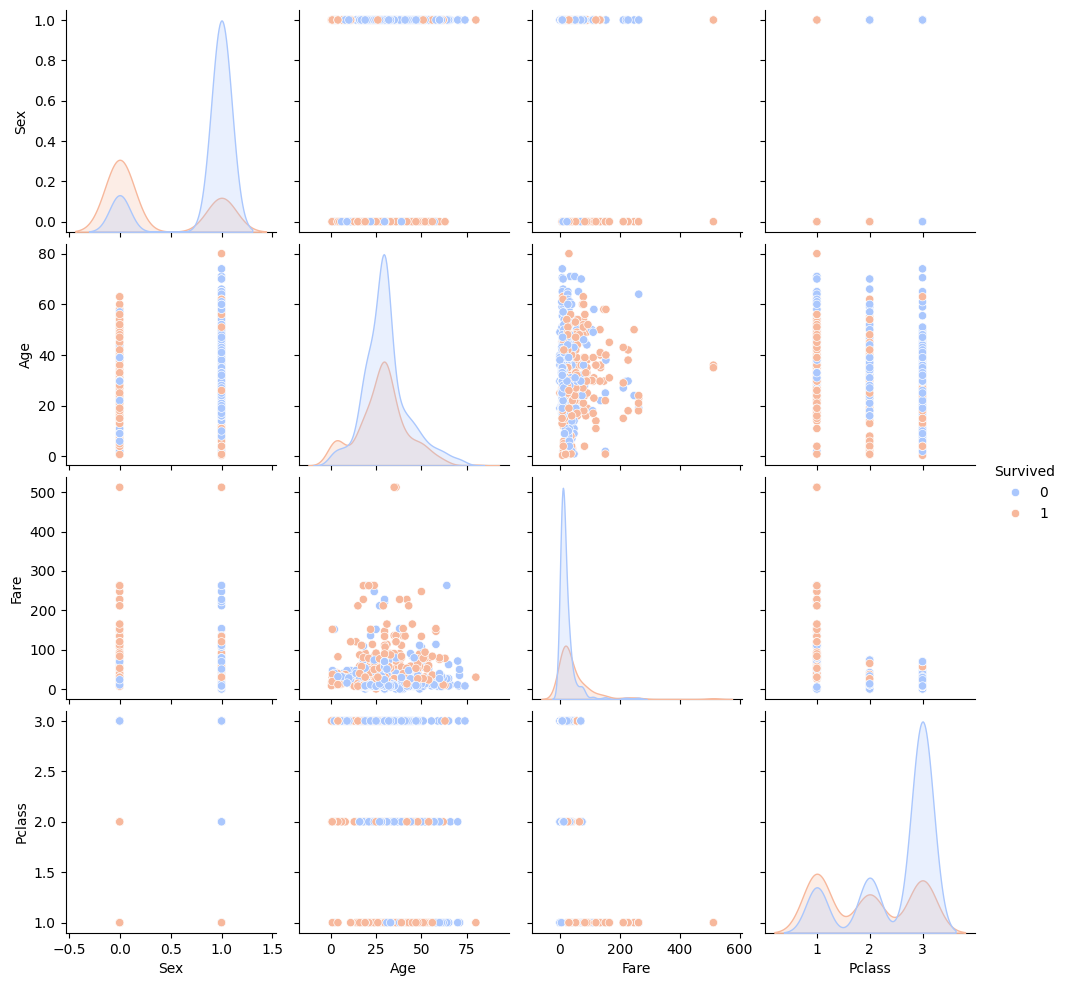

In [103]:
X_train_with_Survived = X_train.copy()
X_train_with_Survived['Survived'] = y_train

plt.figure(figsize=(6, 6))
sns.pairplot(X_train_with_Survived, hue="Survived", palette="coolwarm", kind='scatter')
plt.show()

### 2. ОБУЧЕНИЕ МОДЕЛЕЙ

Для задачи классификации воспользуемся следующими моделями:
* байесовский-гауссовский классификатор
* логистическая регрессия
* SVM (метод опорных векторов)
* метод градиентного спуска
* деревья решений

Воспользуемся train_test_split для разделения данных на тренировочные и тестовые выборки из train_data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### 2.1 Байесовский наивный классификатор

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()
gnb.fit(X=X_train, y=y_train)

GaussianNB()

In [26]:
y_predict = gnb.predict(X_test)

y_predict

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

Воспользуемся метриками для оценки работы модели

In [28]:
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, roc_curve, auc)

In [29]:
rc = roc_curve(y_test, y_predict)

print(f" Accuracy: {accuracy_score(y_test, y_predict)}\n",
      f"Точность (preccision): {precision_score(y_test, y_predict)}\n",
      f"Полнота (recall): {recall_score(y_test, y_predict)}\n",
      f"F1-мера: {f1_score(y_test, y_predict)}\n",
      f"AUC-ROC: {auc(rc[0], rc[1])}")


 Accuracy: 0.7865168539325843
 Точность (preccision): 0.7012987012987013
 Полнота (recall): 0.782608695652174
 F1-мера: 0.7397260273972603
 AUC-ROC: 0.7857997606701235


* Accuracy: 0.79 (78.65%)
Это значение говорит о том, что 78.65% всех предсказаний модели были правильными. Это достаточно хороший результат, но важно учитывать, что эта метрика может быть не очень информативной в случае несбалансированных классов (например, если классы сильно отличаются по частоте).

* Precision (Точность): 0.70 (70.13%)
Это значение говорит о том, что из всех предсказанных положительных классов (выживших), 70.13% действительно оказались положительными (выжившими). Важно, что чем выше точность, тем меньше ложных срабатываний (когда модель предсказывает "выжил", но на самом деле это не так). Если задача предполагает минимизацию ложных срабатываний, то точность важна.

* Recall (Полнота): 0.78 (78.26%)
Полнота измеряет, насколько хорошо модель находит все положительные примеры. В данном случае, модель правильно предсказала 78.26% всех реальных выживших. Важно отметить, что высокая полнота означает, что модель минимизирует пропуск положительных примеров (когда реальный "выживший" был предсказан как "не выжил").

* F1-мера: 0.74 (73.97%)
F1-мера является гармоническим средним между точностью и полнотой. Это позволяет найти баланс между этими метриками, особенно когда важна обе составляющие. В данном случае, значение 0.74 говорит о хорошем балансе между точностью и полнотой, что означает, что модель не слишком сильно переоценивает или недооценит выживших.

* AUC-ROC: 0.79 (78.58%)
AUC (Area Under the Curve) показывает, насколько хорошо модель различает классы. Значение 0.79 говорит о хорошем качестве модели: модель на 78.58% способна различить выживших и не выживших, что является хорошим результатом для классификации.

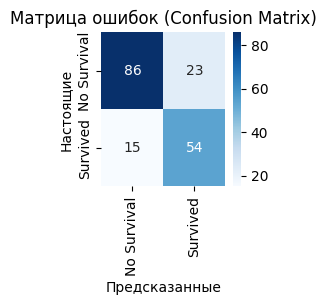

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные')
plt.ylabel('Настоящие')
plt.show()


Модель байесовского гауссовского классифактора неплохо показала себя

#### 2.2 Логистическая регрессия

In [31]:
from sklearn.linear_model import LogisticRegression

In [36]:
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

y_predict = model_lg.predict(X_test)
y_predict

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1], dtype=int64)

In [37]:
rc = roc_curve(y_test, y_predict)

print(f" Accuracy: {accuracy_score(y_test, y_predict)}\n",
      f"Точность (preccision): {precision_score(y_test, y_predict)}\n",
      f"Полнота (recall): {recall_score(y_test, y_predict)}\n",
      f"F1-мера: {f1_score(y_test, y_predict)}\n",
      f"AUC-ROC: {auc(rc[0], rc[1])}")


 Accuracy: 0.7921348314606742
 Точность (preccision): 0.7105263157894737
 Полнота (recall): 0.782608695652174
 F1-мера: 0.7448275862068965
 AUC-ROC: 0.7903869166334263


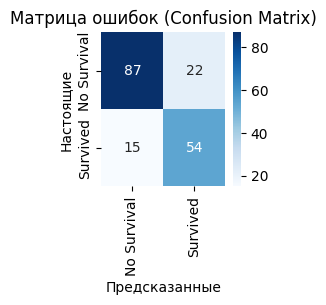

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные')
plt.ylabel('Настоящие')
plt.show()


На тех же данных логистическая регрессия показала себя чуть лучше, чем байесовский метод

#### 2.3 SVM (метод опорных векторов)

In [39]:
from sklearn import svm

In [42]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_predict = svm_model.predict(X_test)

In [43]:
rc = roc_curve(y_test, y_predict)

print(f" Accuracy: {accuracy_score(y_test, y_predict)}\n",
      f"Точность (preccision): {precision_score(y_test, y_predict)}\n",
      f"Полнота (recall): {recall_score(y_test, y_predict)}\n",
      f"F1-мера: {f1_score(y_test, y_predict)}\n",
      f"AUC-ROC: {auc(rc[0], rc[1])}")


 Accuracy: 0.6797752808988764
 Точность (preccision): 0.7
 Полнота (recall): 0.30434782608695654
 F1-мера: 0.42424242424242425
 AUC-ROC: 0.6108895093737535


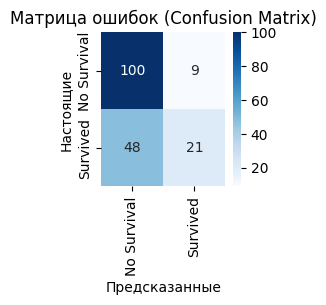

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные')
plt.ylabel('Настоящие')
plt.show()


Метод опорных векторов плохо сработал на данных - точность ухудшилась, опреление TP вообще ухудшилось на 0.3 

#### 2.4 Метод градиентного спуска


In [59]:
from sklearn.linear_model import SGDClassifier

In [60]:
model_sdg = SGDClassifier()
model_sdg.fit(X_train, y_train)

y_predict = model_sdg.predict(X_test)
y_predict

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [61]:
rc = roc_curve(y_test, y_predict)

print(f" Accuracy: {accuracy_score(y_test, y_predict)}\n",
      f"Точность (preccision): {precision_score(y_test, y_predict)}\n",
      f"Полнота (recall): {recall_score(y_test, y_predict)}\n",
      f"F1-мера: {f1_score(y_test, y_predict)}\n",
      f"AUC-ROC: {auc(rc[0], rc[1])}")


 Accuracy: 0.651685393258427
 Точность (preccision): 0.5299145299145299
 Полнота (recall): 0.8985507246376812
 F1-мера: 0.6666666666666667
 AUC-ROC: 0.6969817843371892


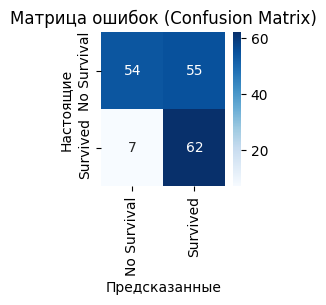

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные')
plt.ylabel('Настоящие')
plt.show()


Метод градиентного стохастического спуска идёт на уровне с логистической регрессией

#### 2.5. Деревья решений

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
model_tree.fit(X_train, y_train)

y_predict = model_tree.predict(X_test)


In [65]:
rc = roc_curve(y_test, y_predict)

print(f" Accuracy: {accuracy_score(y_test, y_predict)}\n",
      f"Точность (preccision): {precision_score(y_test, y_predict)}\n",
      f"Полнота (recall): {recall_score(y_test, y_predict)}\n",
      f"F1-мера: {f1_score(y_test, y_predict)}\n",
      f"AUC-ROC: {auc(rc[0], rc[1])}")


 Accuracy: 0.8146067415730337
 Точность (preccision): 0.7727272727272727
 Полнота (recall): 0.7391304347826086
 F1-мера: 0.7555555555555555
 AUC-ROC: 0.800757877941763


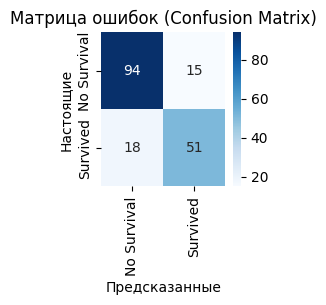

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные')
plt.ylabel('Настоящие')
plt.show()


Лучше всего себя показала модель дерева решений - Decision Tree
Посмотрим, как она будет работать с новыми данными.

### 3. ПРЕДСКАЗЫВАНИЕ ЗНАЧЕНИЙ

In [99]:
X_test_data = test_data[['Sex', 'Age', 'Fare', 'Pclass']]

In [100]:
X_test_data_survived = X_test_data.copy()
X_test_data_survived['Survived']= model_tree.predict(X_test_data)

<Figure size 400x400 with 0 Axes>

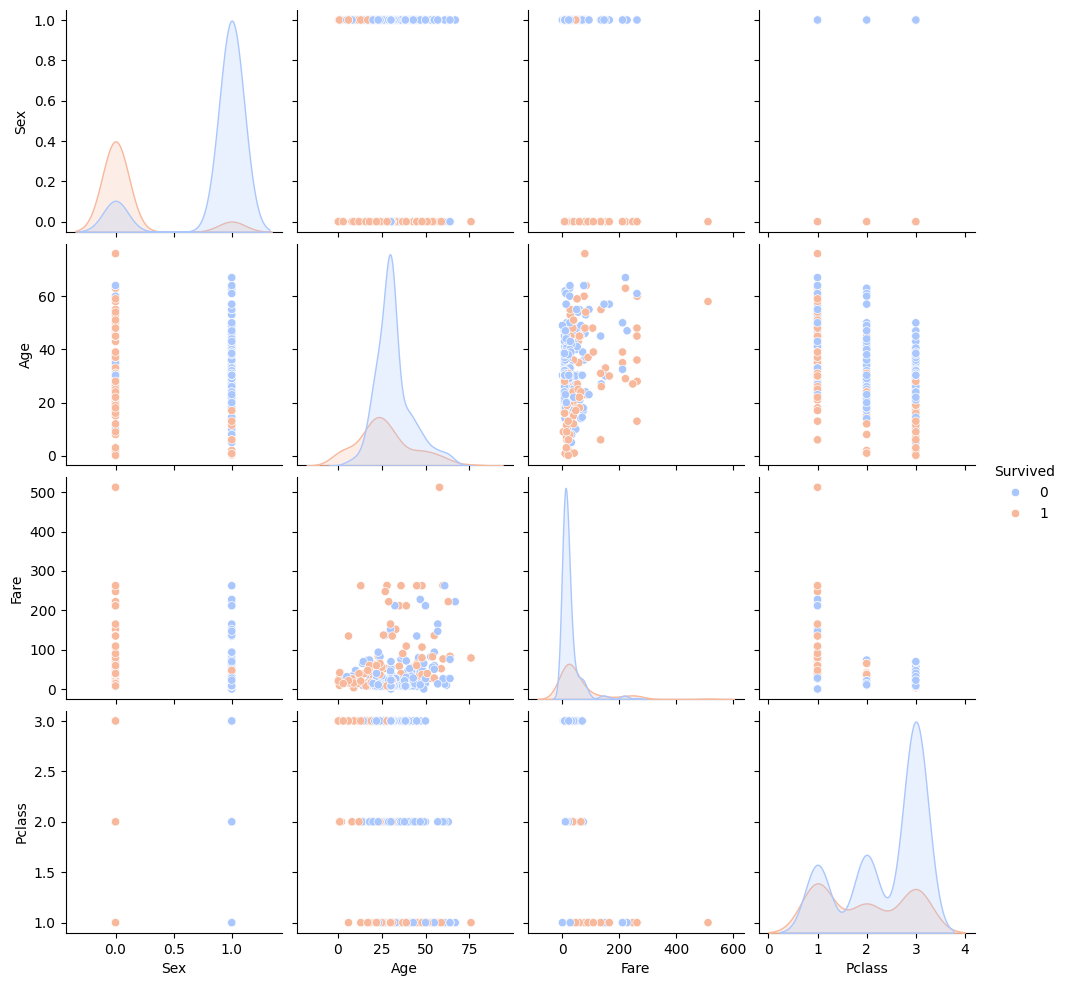

In [102]:
plt.figure(figsize=(4, 4))
sns.pairplot(X_test_data_survived, hue="Survived", palette="coolwarm", kind='scatter')
plt.show()



Сравним эти распределния с распределением изначальным из тестовых выборок

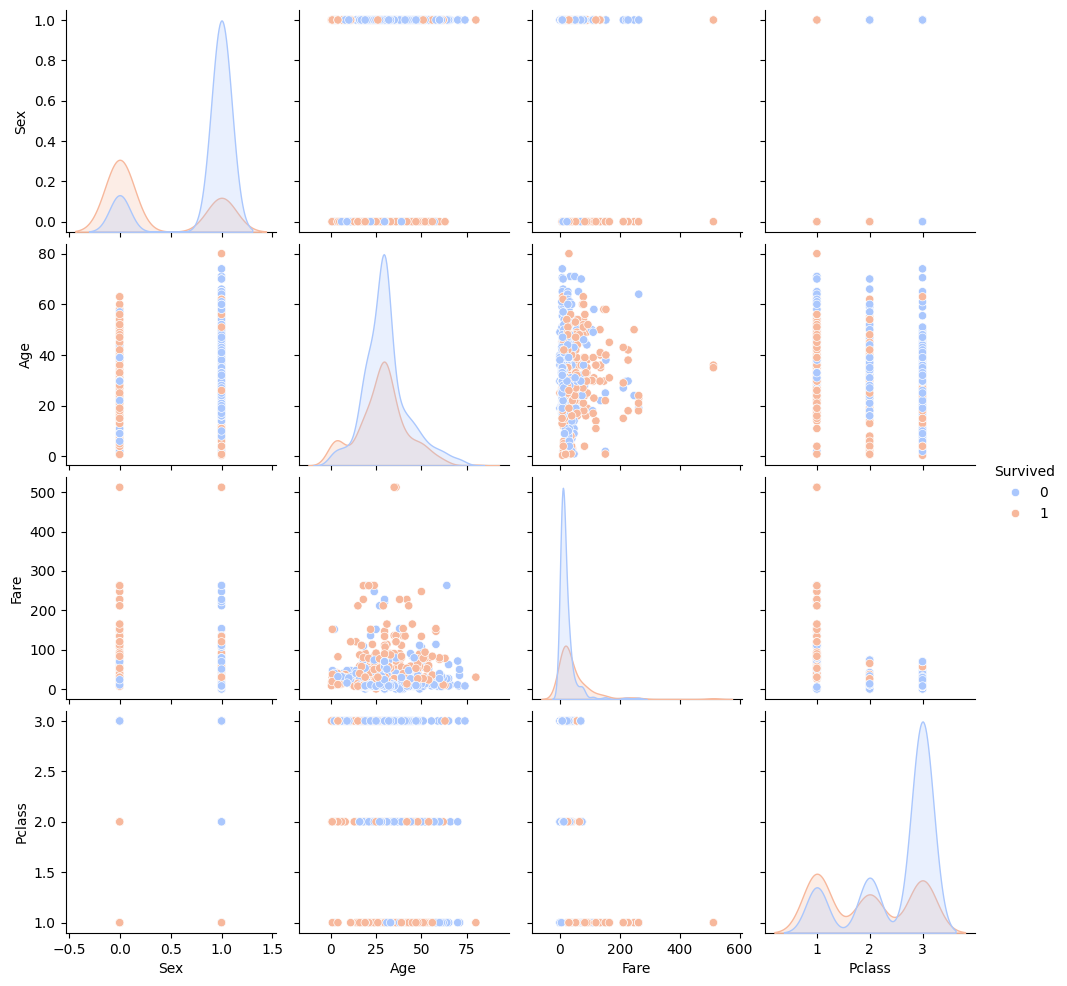

По графикам видно, что увеличилась доля определения значений для выживших пассажиров.
